### Predicting Stock Prices using Machine Learning

In [4]:
# import the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
plt.style.use('bmh')

In [12]:
# Load the data
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(365)
end_date, start_date

(datetime.datetime(2024, 4, 22, 15, 43, 43, 694221),
 datetime.datetime(2023, 4, 23, 15, 43, 43, 694221))

In [13]:
df = yf.download('NFLX', start=start_date, end=end_date).reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-24,330.200012,334.660004,326.750000,329.019989,329.019989,5586600
1,2023-04-25,328.500000,328.660004,321.100006,322.549988,322.549988,5426600
2,2023-04-26,321.359985,325.899994,320.470001,321.149994,321.149994,4623200
3,2023-04-27,324.299988,327.450012,317.440002,325.850006,325.850006,5618800
4,2023-04-28,325.239990,330.809998,324.000000,329.929993,329.929993,4221900


In [14]:
# Get the number of trading days
df.shape

(250, 7)

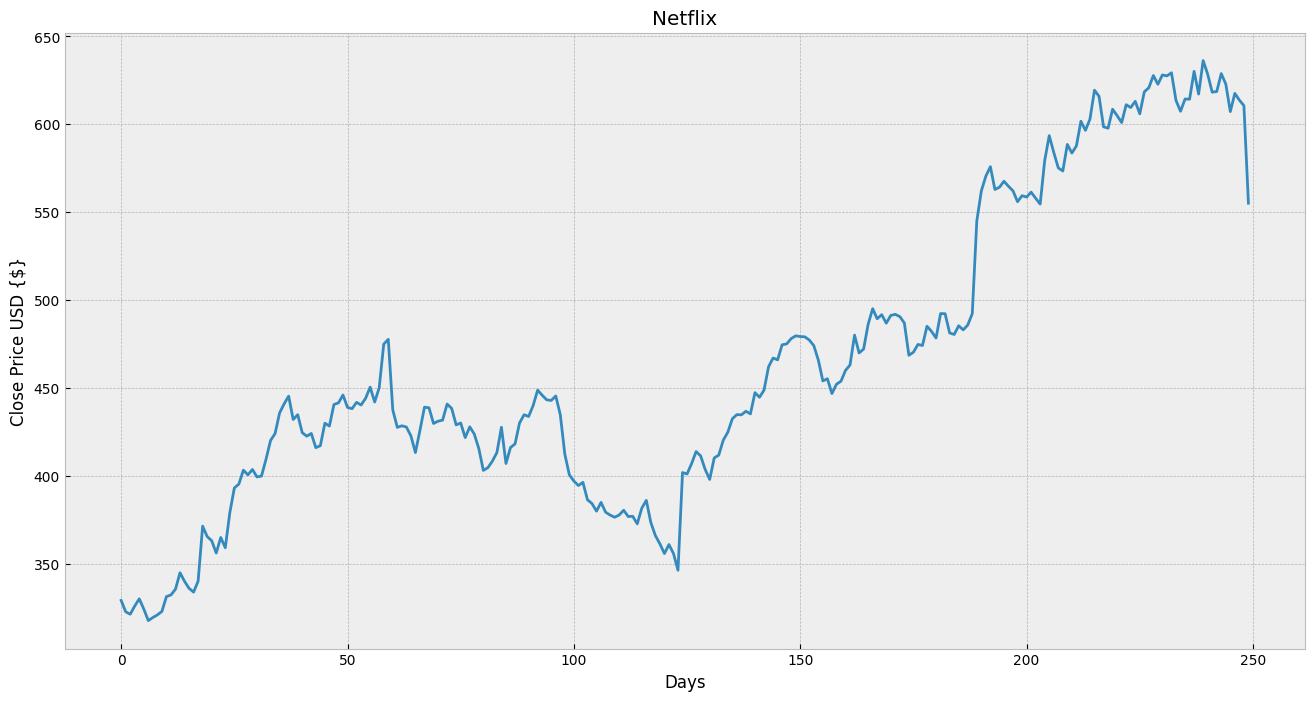

In [15]:
# visualize the close price data
plt.figure(figsize=(16,8))
plt.title("Netflix")
plt.xlabel("Days")
plt.ylabel("Close Price USD {$}")
plt.plot(df['Close'])
plt.show()

In [20]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,329.019989
1,322.549988
2,321.149994
3,325.850006
4,329.929993


In [21]:
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df.loc[:, 'Prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,Prediction
0,329.019989,392.980011
1,322.549988,395.230011
2,321.149994,403.130005
3,325.850006,400.470001
4,329.929993,403.540009


In [22]:
df.tail()

,Close,Prediction
245,607.150024,NaN
246,617.520020,NaN
247,613.690002,NaN
248,610.559998,NaN
249,555.039978,NaN


In [30]:
# Create the feature dataset (X) and convert it into a numpy array and remove the last 'x' rows /days
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
X

array([[329.01998901],
       [322.54998779],
       [321.1499939 ],
       [325.8500061 ],
       [329.92999268],
       [324.11999512],
       [317.54998779],
       [319.29998779],
       [320.77999878],
       [322.76000977],
       [331.20999146],
       [332.14001465],
       [335.42001343],
       [344.76000977],
       [339.89001465],
       [335.89001465],
       [333.75      ],
       [339.95999146],
       [371.29000854],
       [365.35998535],
       [363.01000977],
       [355.98999023],
       [364.8500061 ],
       [359.        ],
       [378.88000488],
       [392.98001099],
       [395.23001099],
       [403.13000488],
       [400.47000122],
       [403.54000854],
       [399.29000854],
       [399.76998901],
       [409.36999512],
       [420.01998901],
       [423.97000122],
       [435.73001099],
       [440.85998535],
       [445.26998901],
       [431.95999146],
       [434.70001221],
       [424.45001221],
       [422.48001099],
       [424.01998901],
       [415

In [31]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows or days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[392.98001099 395.23001099 403.13000488 400.47000122 403.54000854
 399.29000854 399.76998901 409.36999512 420.01998901 423.97000122
 435.73001099 440.85998535 445.26998901 431.95999146 434.70001221
 424.45001221 422.48001099 424.01998901 415.94000244 417.07998657
 429.83999634 428.23999023 440.48999023 441.44000244 445.8999939
 438.83999634 438.1000061  441.70999146 440.20999146 444.04998779
 450.38000488 441.91000366 450.04998779 474.79998779 477.58999634
 437.42001343 427.5        428.36999512 427.70001221 422.67001343
 413.17001343 425.77999878 438.97000122 438.61999512 429.70001221
 431.         431.6000061  440.76000977 438.29998779 428.8999939
 429.98001099 421.66000366 427.77999878 423.70001221 415.45001221
 403.         404.52999878 408.29000854 413.17001343 427.54998779
 406.92999268 416.02999878 418.05999756 429.98999023 434.67001343
 433.67999268 439.88000488 448.67999268 445.76000977 443.14001465
 442.79998779 445.35998535 434.69000244 412.23999023 400.48999023
 396.9400024

In [32]:
# Split the data into 75 percent training and 25 percent testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [34]:
# Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[558.5300293 ],
       [561.32000732],
       [557.84997559],
       [554.52001953],
       [579.33001709],
       [593.46002197],
       [583.95001221],
       [575.13000488],
       [573.34997559],
       [588.4699707 ],
       [583.55999756],
       [587.65002441],
       [601.66998291],
       [596.47998047],
       [602.91998291],
       [619.34002686],
       [615.83001709],
       [598.5       ],
       [597.69000244],
       [608.51000977],
       [604.82000732],
       [600.92999268],
       [611.08001709],
       [609.45001221],
       [613.01000977]])

In [38]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[605.88000488 618.39001465 620.73999023 627.69000244 629.23999023
 628.01000977 627.46002197 629.23999023 613.5300293  607.33001709
 614.30999756 614.21002197 617.52001953 617.14001465 636.17999268
 628.40997314 618.20001221 618.58001709 628.7800293  610.55999756
 607.15002441 617.52001953 610.55999756 610.55999756 555.03997803]


In [37]:
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[574.48651625 576.90670752 573.8965976  571.00799758 592.52965079
 604.78684928 596.53730667 588.88631281 587.34221056 600.4581849
 596.19898499 599.74691519 611.90865297 607.40653916 612.9929766
 627.23668986 624.19190065 609.15882308 608.45618349 617.84209515
 614.64116969 611.26674186 620.07147087 618.65750863 621.7456602 ]


/tmp/ipykernel_13058/267580592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


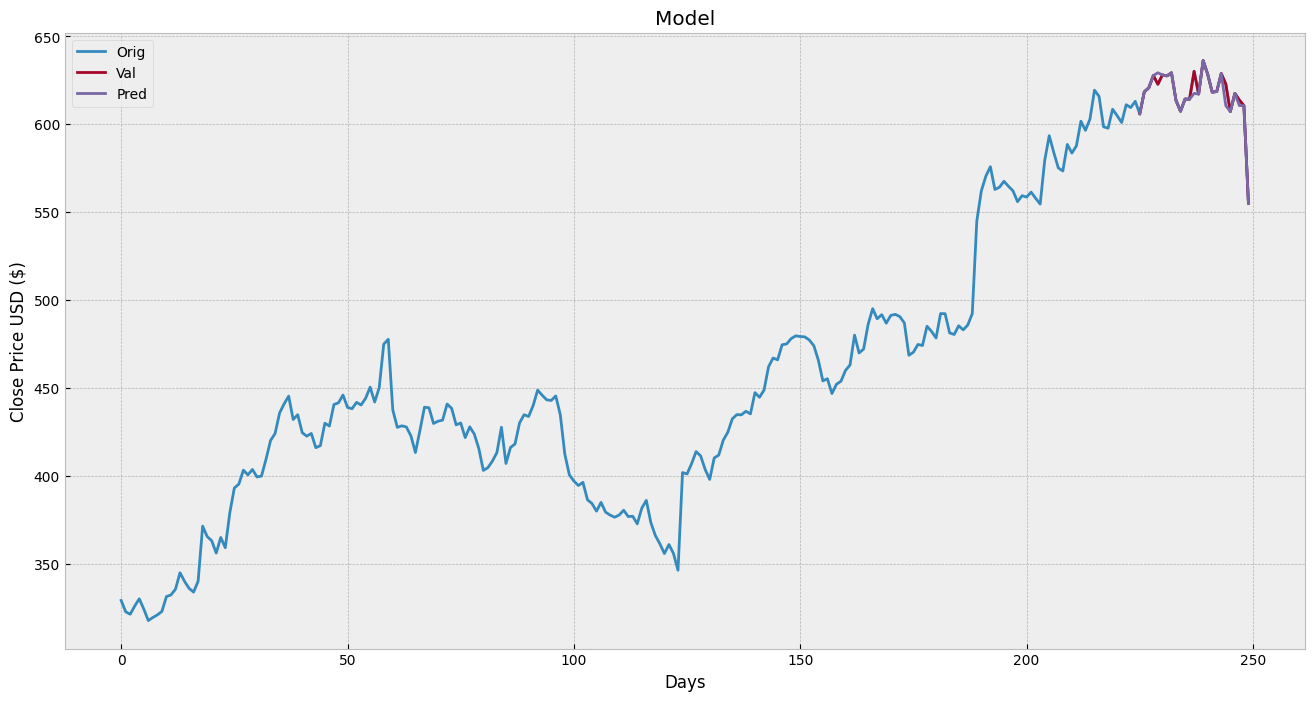

In [40]:
# Visualize the data with tree model
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/tmp/ipykernel_13058/3747676281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


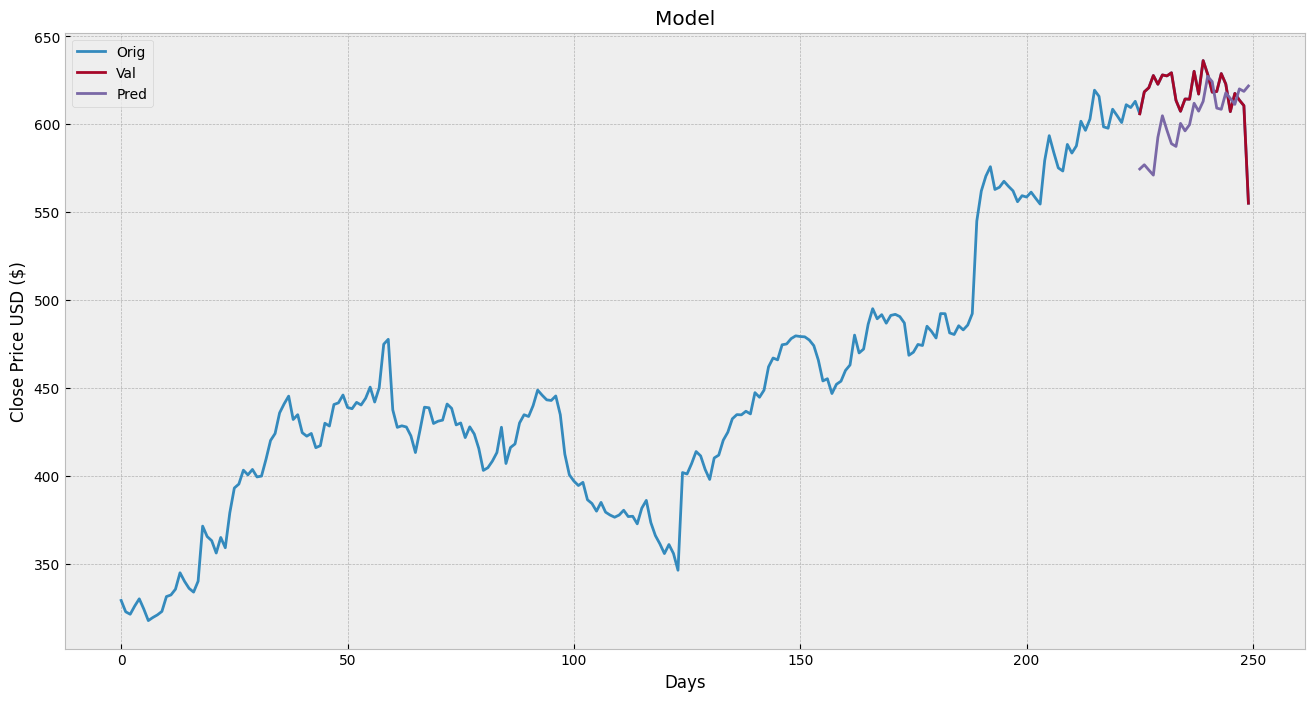

In [42]:
# Visualize the data with linear regression model
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()